In [60]:
import pandas as pd 
import numpy as np
#read in data 
df=pd.read_csv('/Users/zhejindong/Downloads/X.csv',header=None)
y=pd.read_csv('/Users/zhejindong/Downloads/y.csv',header=None)
df['y']=y

## Shuffle data 

In [61]:
#df=df.sample(frac=1).reset_index(drop=True)
from sklearn.utils import shuffle
df = shuffle(df)

## Naive Bayes 

In [64]:
df_0=df.iloc[:,:][df['y']==0]
df_1=df.iloc[:,:][df['y']==1]

# parameters estimation 
pi=float(df['y'].sum()/len(df))
lambda_0d=(1+df_0.iloc[:,:54].sum(axis=0))/(1+len(df_0))
lambda_1d=(1+df_1.iloc[:,:54].sum(axis=0))/(1+len(df_1))

# Prediction model 
from scipy.stats import poisson

In [65]:
def accuracy(predict,true): # predict and true are both arrays 
    TP=0
    TN=0
    FP=0
    FN=0
    for i in zip(predict,true):
        if i[0]==1 and i[1]==1:
            TP=TP+1
        if i[0]==0 and i[1]==0:
            TN=TN+1
    FP=sum(predict)-TP 
    FN=len(predict)-FP-TP-TN
    return (TP,FP,TN,FN)

from scipy.stats import poisson
import numpy as np
#proba_0=np.prod(poisson.pmf(df_0.iloc[:,:54],lambda_0d),axis=1)*(1-pi)
#proba_1=np.prod(poisson.pmf(df_0.iloc[:,:54],lambda_1d),axis=1)*(pi)


def NB_estimator(train_x_df):
    df_0=train_x_df.iloc[:,:][train_x_df['y']==0]
    df_1=train_x_df.iloc[:,:][train_x_df['y']==1]
    pi=float(train_x_df['y'].sum()/len(train_x_df))
    lambda_0d=(1+df_0.iloc[:,:54].sum(axis=0))/(1+len(df_0))
    lambda_1d=(1+df_1.iloc[:,:54].sum(axis=0))/(1+len(df_1))
    return {'pi':pi,'lambda_0d':lambda_0d,'lambda_1d':lambda_1d}

def Predict(test_x,test_y,pi,lambda_0d,lambda_1d):
    proba_0=np.prod(poisson.pmf(test_x,lambda_0d),axis=1)*(1-pi)
    proba_1=np.prod(poisson.pmf(test_x,lambda_1d),axis=1)*(pi)
    predict=np.zeros(len(test_y))
    pred=map(lambda x,y:x>y,proba_1,proba_0)
    predict[list(pred)]=1
    return accuracy(predict,test_y)

# cross validation process:

cv=10
step=int(len(df)/cv)
ans=[]
lambda_0d=[]
lambda_1d=[]
for i in range(cv):
    test_x_index=list(range(i*step,(i+1)*step))
    train_x_index=list(range(0,i*step))+list(range((i+1)*step,len(df)))
    train_x_df=df.iloc[train_x_index,:]
    test_x=df.iloc[test_x_index,:54]
    test_y=df.iloc[test_x_index,:]['y']
    para=NB_estimator(train_x_df)
    pi=para['pi']
    lambda_0d.append(para['lambda_0d'])
    lambda_1d.append(para['lambda_1d'])
    ans.append(Predict(test_x,test_y,pi,lambda_0d[-1],lambda_1d[-1]))


(a)  Implement the naive Bayes classifier described above. In a 2×2 table, write the number of times that you predicted a classydata point (ground truth) as a class y′data point (model prediction) inthe(y,y′)-th cell of the table, where y an dy′ can be either 0 or 1.  There should be four valueswritten in the table in your PDF. Next to your table, write the prediction accuracy—the sum of thediagonal divided by4600. (The sum of all entries in the table should be 4600.)

In [66]:

t=np.array(ans).sum(axis=0)
rows = ['True Positive','True_Negative']
print('             Predict_positive    Predict_Negative')
print('True_positive    {}                  {}'.format(t[0],t[3]))
print('True_negative    {}                  {}'.format(t[1],t[2]))

print("prediction is: {}".format((t[0]+t[2])/(4600)))

             Predict_positive    Predict_Negative
True_positive    1701.0                  112.0
True_negative    491.0                  2296.0
prediction is: 0.8689130434782608


(b)  In one figure, show a stem plot (stem()in Matlab) of the 54 Poisson parameters for each classaveraged across the 10 runs.  (This average is only used for plotting purposes on this homework.In practice you would relearn these parameters using the entire data set to find their final values.) Use the README file to make an observation about dimensions 16 and 52.

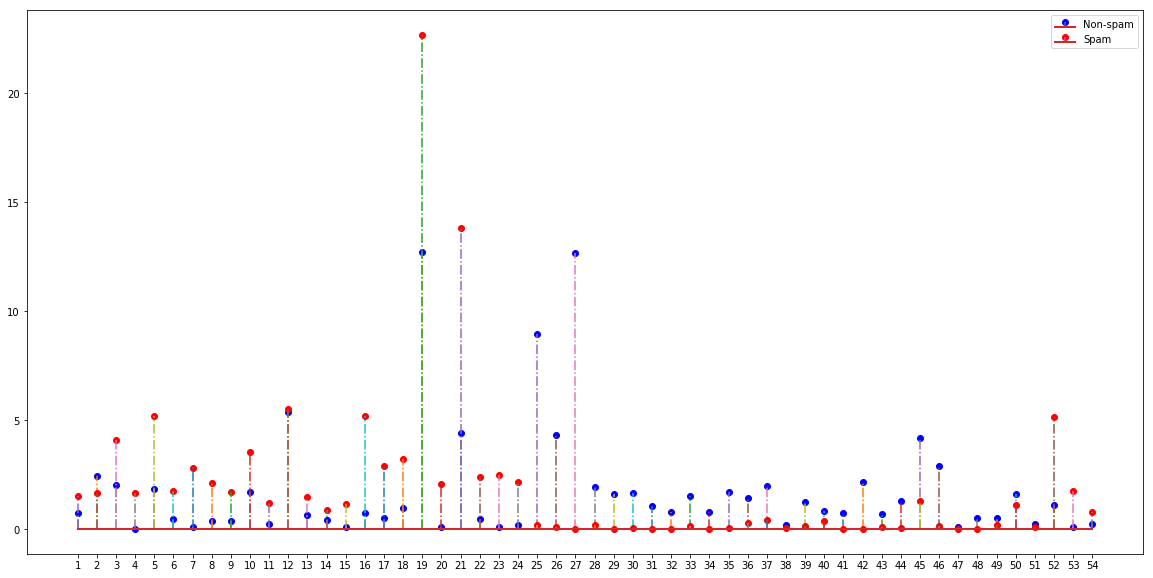

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# returns 10 evenly spaced samples from 0.1 to 2*PI
plt.figure(figsize=(20,10))
x = list(range(1,55))
markerline, stemlines, baseline = plt.stem(x, np.array(lambda_0d).mean(axis=0), '-.',label="Non-spam",markerfmt='bo')

markerline2, stemlines2, baseline2=plt.stem(x, np.array(lambda_1d).mean(axis=0), '-.',label="Spam",markerfmt='ro')
# setting property of baseline with color red and linewidth 2
plt.setp(baseline, linewidth=2)
plt.setp(baseline2, linewidth=2)
plt.legend()
plt.xticks(np.arange(1, 55, step=1))
plt.show()

### Answer:


As shown in the picture, dimensions 19, 21, 25, 27, 52 can apparently sperate the spam and non spam. We can conclude that 
Spam emails have higher frequency for words 'you', 'your', and '!'. However, for nonspam emails, 'hp' and 'george' have higher
frequency.

  

(c)  Implement the k-NN classifier for k= 1,...,20.  Use the`1distance for this problem.  Plot the prediction accuracy as a function of k.

In [68]:
from numpy import linalg as LA
cv=10
step=int(len(df)/cv)
ans=[]
for k in range(1,21):
    acc_k=[]
    for i in range(cv):
        test_x_index=list(range(i*step,(i+1)*step))
        train_x_index=list(range(0,i*step))+list(range((i+1)*step,len(df)))
        train_x=df.iloc[train_x_index,:54]
        train_y=df.iloc[train_x_index,:]['y']
        test_x=df.iloc[test_x_index,:54]
        test_y=df.iloc[test_x_index,:]['y']
        predict=[]
        for j in range(0,len(test_x)):
            dist=test_x.values[j]-train_x.values
            distance=LA.norm(dist,axis=1,ord=1)
            kNN=distance.argsort()[:k]
            if list(train_y.values[kNN]).count(0)>=k/2:
                predict.append(0)
            else:
                predict.append(1)
        
        acc_k.append(sum(predict==test_y)/len(test_y))
        
    ans.append(float(sum(acc_k))/len(acc_k))

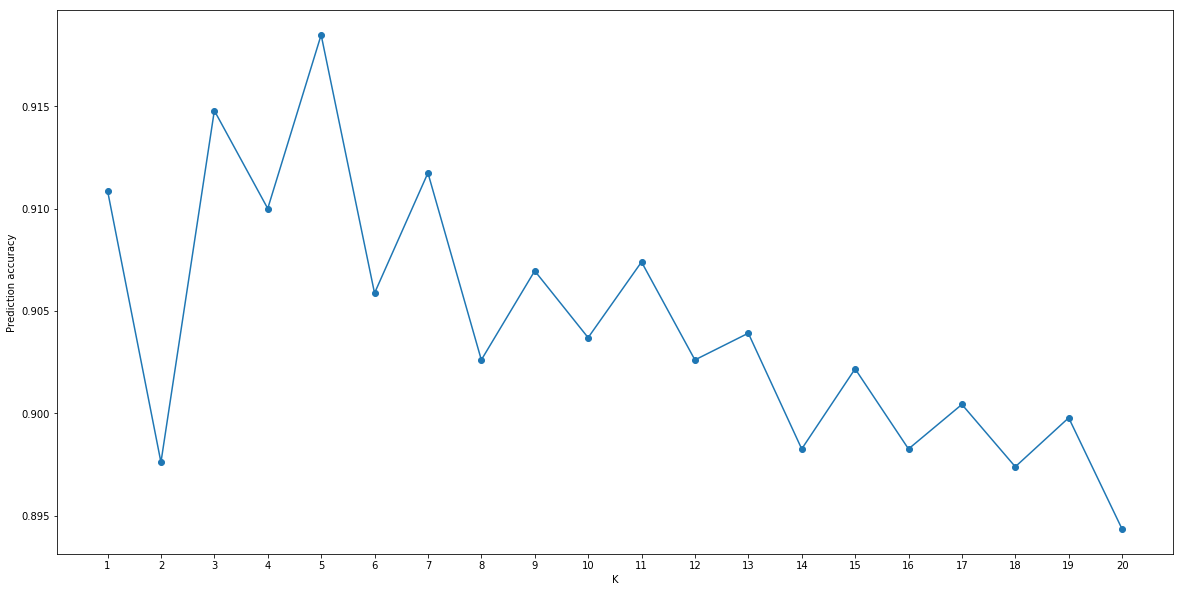

In [69]:
plt.figure(figsize=(20,10))
plt.plot(list(range(1,21)),ans,'o-')
plt.xticks(np.arange(1,21, step=1))
plt.ylabel("Prediction accuracy")
plt.xlabel("K")
plt.show()

### Conclusion for KNN model 

An obvious pattern in knn model is that, when the number of neighbors is odd, the prediction accuracy is higher. That is due to there is no ambiguity when looking for the mode of k neighbors. 

Finally, you will run logistic regression on the same data set. Set every yi= 0 to yi=−1 for this part. Also, be sure to add a dimension equal to+1 to each data point.

(d)  Implement the steepest ascent algorithm discussed in class.  Use a step size η=0.01/4600.  Run your algorithm for 1,000 iterations and plot the logistic regression objective training function L periteration for each of the 10 training runs. Plot this in the same figure.

In [268]:
# Set every yi= 0 to yi=−1
target=df['y'].replace(0,-1)
df=df.drop(columns=['y'])
df['add']=1
df['y']=target
η=0.01/4600

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [269]:
cv=10
step=int(len(df)/cv)
ans=[]
for i in range(cv):
        test_x_index=list(range(i*step,(i+1)*step))
        train_x_index=list(range(0,i*step))+list(range((i+1)*step,len(df)))
        train_x=df.iloc[train_x_index,:55]
        train_x=np.array(train_x)
        train_y=df.iloc[train_x_index,:]['y']
        train_y=np.array(train_y).reshape((len(train_y),1))
        test_x=df.iloc[test_x_index,:55]
        test_y=df.iloc[test_x_index,:]['y']
        w=np.zeros((train_x.shape[1],1))
        obj=[]
        for iteration in range(0,1000):
            update=((1-sigmoid(train_y*train_x.dot(w)))*train_y*train_x).sum(axis=0).reshape(-1,+1)
            w=w+η*update
            obj.extend(sum(np.log(sigmoid(train_y*train_x.dot(w)))))
        ans.append(obj)

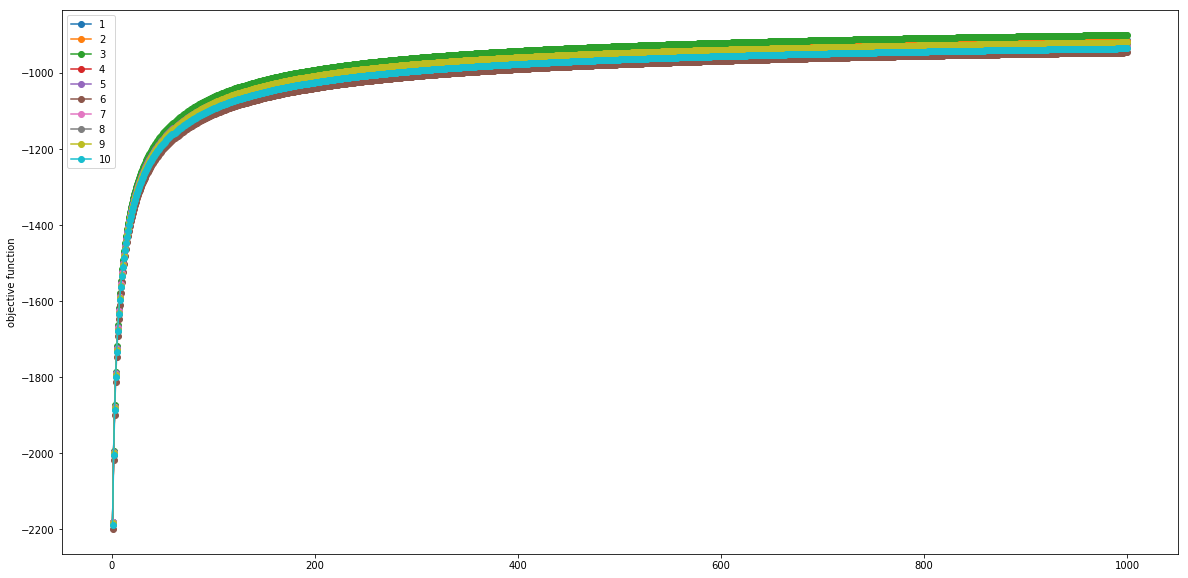

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(cv):
    plt.plot(list(range(1,1001)),np.array(ans)[i],'o-',label=str(i+1))
    
plt.ylabel('objective function')
plt.legend()

(e)  Finally, implement an algorithm called “Newton’s method” for logistic regression as follows:  Atiteration t, approximate the function

Then set wt+1= arg max wL′(w). Derive the update for wt+1 for the logistic regression problemand implement and run this algorithm. Plot the objective function L on the training data as a function of t= 1,...,100 for each of the 10 training runs. Plot this in the same figure.

In [205]:
from numpy.linalg import inv

def Accuracy(predict,true): # predict and true are both arrays 
    TP=0
    TN=0
    FP=0
    FN=0
    for i in zip(predict,true):
        if i[0]==1 and i[1]==1:
            TP=TP+1
        if i[0]==-1 and i[1]==-1:
            TN=TN+1
    FP=sum(predict)-TP 
    FN=len(predict)-FP-TP-TN
    return (TP,FP,TN,FN)




def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def gradient(train_x,train_y,w):
    return (train_y*train_x).dot((1-sigmoid(train_y.T*train_x.T.dot(w))))


def hessian(train_x, train_y,w):
    return -(train_y*train_x).dot((train_y.T*train_x.T)*((1-sigmoid(train_y.T*train_x.T.dot(w)))*sigmoid(train_y.T*train_x.T.dot(w))))



def newtons_method(train_x, train_y):
    train_x1=train_x.T
    train_y1=train_y.T
    w = np.zeros((train_x1.shape[0],1))
    obj=[]
    i=0
    while i<100:
        if len(obj)>40 and obj[-1]==obj[-2]:
            #print(i)
            obj.append(obj[-1])
            i=i+1
            continue
        else:
            obj.append(sum(np.log(sigmoid(train_y1.T*train_x1.T.dot(w))))[0])
            g = gradient(train_x1, train_y1,w)
            h = hessian(train_x1,train_y1,w)
            w -= np.dot(np.linalg.inv(h), g)
            i=1+i

  
    return {'w':w,'obj':obj}


#w=newtons_method(train_x, train_y)

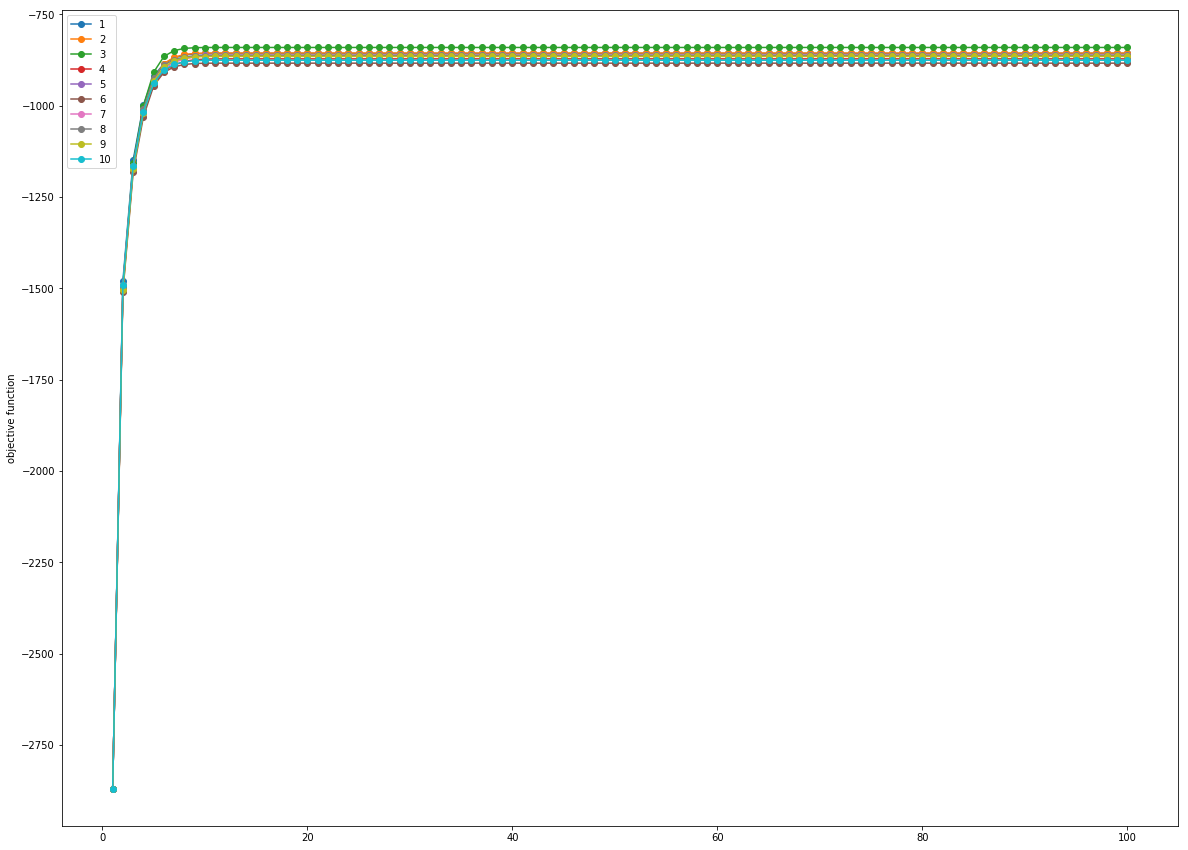

In [264]:
def Accuracy(predict,true): # predict and true are both arrays 
    TP=0
    TN=0
    FP=0
    FN=0
    for i in zip(predict,true):
        if i[0]==1 and i[1]==1:
            TP=TP+1
        if i[0]==-1 and i[1]==-1:
            TN=TN+1
        if i[0]==1 and i[1]==-1:
            FP=FP+1
    FN=len(predict)-FP-TP-TN
    return [TP,FP,TN,FN]


def Predict_logistic(w,test_x,test_y):
    
    def f(x):
        if x>0.5:
            return 1
        else:
            return -1
        
    predict=sigmoid(test_x.dot(w))
    return list(map(f,predict))

cv=10
step=int(len(df)/cv)
ans=[]
score=[]
for i in range(cv):
        test_x_index=list(range(i*step,(i+1)*step))
        train_x_index=list(range(0,i*step))+list(range((i+1)*step,len(df)))
        train_x=df.iloc[train_x_index,:55]
        train_x=np.array(train_x)
        train_y=df.iloc[train_x_index,:]['y']
        train_y=np.array(train_y).reshape((len(train_y),1))
        test_x=df.iloc[test_x_index,:55]
        test_x=np.array(test_x)
        test_y=df.iloc[test_x_index,:]['y']
        test_y=np.array(test_y).reshape((len(test_y),1))
        res=newtons_method(train_x, train_y)
        pred=Predict_logistic(res['w'],test_x,test_y)
        score.append(Accuracy(pred,test_y))
        ans.append(res['obj'])

        
plt.figure(figsize=(20,15))
for i in range(cv):
    plt.plot(list(range(1,101)),np.array(ans)[i],'o-',label=str(i+1))
    
plt.ylabel('objective function')
plt.legend()

(f)  In a 2×2 table, show the testing results using Newton’s method in the same way as shown in Problem 2(a).

In [267]:
t=np.array(score).sum(axis=0)
rows = ['True Positive','True_Negative']
print('             Predict_positive    Predict_Negative')
print('True_positive    {}                  {}'.format(t[0],t[3]))
print('True_negative    {}                  {}'.format(t[1],t[2]))

print("prediction is: {}".format((t[0]+t[2])/(4600)))

             Predict_positive    Predict_Negative
True_positive    1602                  211
True_negative    141                  2646
prediction is: 0.9234782608695652


### Conclusion for Newton Method

Newton method is more quick to converge than gradient descent. As shown in the picture, at iteration 10, the objective function begins converge. However, to use Newton Method, we need to calculate the inverse of Hessian matrix, which can bring two problem: 1 we cannot guarantee the hessian matrix is always full rank. 2 Matrix inversion is computaional expensive. 